In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.activations import relu, softmax
from tensorflow.keras.optimizers import Adam, RMSprop
from tensorflow.keras.losses import categorical_crossentropy
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
test_dataset_path = '/content/drive/MyDrive/PyLearn/Datasets/17Flowers/test'

test_data_generator = ImageDataGenerator(rescale=1.0 / 255)

test_dataset = test_data_generator.flow_from_directory(test_dataset_path)

Found 340 images belonging to 17 classes.


In [6]:
test_dataset.class_indices

{'bluebell': 0,
 'buttercup': 1,
 'coltsfoot': 2,
 'cowslip': 3,
 'crocus': 4,
 'daffodil': 5,
 'daisy': 6,
 'dandelion': 7,
 'fritillary': 8,
 'iris': 9,
 'lilyvalley': 10,
 'pansy': 11,
 'snowdrop': 12,
 'sunflower': 13,
 'tigerlily': 14,
 'tulip': 15,
 'windflower': 16}

In [3]:
train_dataset_path = '/content/drive/MyDrive/PyLearn/Datasets/17Flowers/train'

train_data_generator = ImageDataGenerator(rescale=1.0 / 255, validation_split=.1)

train_dataset = train_data_generator.flow_from_directory(
    train_dataset_path,
    shuffle=True,
    subset='training',
    batch_size=32,
    target_size=(256, 256)
)

validation_dataset = train_data_generator.flow_from_directory(
    train_dataset_path,
    shuffle=False,
    subset='validation',
    batch_size=32,
    target_size=(256, 256)
)

FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/PyLearn/Datasets/17Flowers/train'

Epoch 1/10
29/29 [==============================] - 46s 2s/step - loss: 3.1248 - accuracy: 0.0962 - val_loss: 2.5093 - val_accuracy: 0.1474
Epoch 2/10
29/29 [==============================] - 44s 2s/step - loss: 2.4060 - accuracy: 0.2097 - val_loss: 1.9802 - val_accuracy: 0.3158
Epoch 3/10
29/29 [==============================] - 44s 2s/step - loss: 2.0043 - accuracy: 0.3470 - val_loss: 1.6983 - val_accuracy: 0.4316
Epoch 4/10
29/29 [==============================] - 45s 2s/step - loss: 1.5735 - accuracy: 0.4811 - val_loss: 1.3340 - val_accuracy: 0.5053
Epoch 5/10
29/29 [==============================] - 44s 2s/step - loss: 1.2310 - accuracy: 0.6054 - val_loss: 1.3128 - val_accuracy: 0.5474
Epoch 6/10
29/29 [==============================] - 45s 2s/step - loss: 0.7912 - accuracy: 0.7481 - val_loss: 1.1901 - val_accuracy: 0.5579
Epoch 7/10
29/29 [==============================] - 49s 2s/step - loss: 0.5804 - accuracy: 0.8205 - val_loss: 1.2602 - val_accuracy: 0.5579
Epoch 8/10
29/29 [==

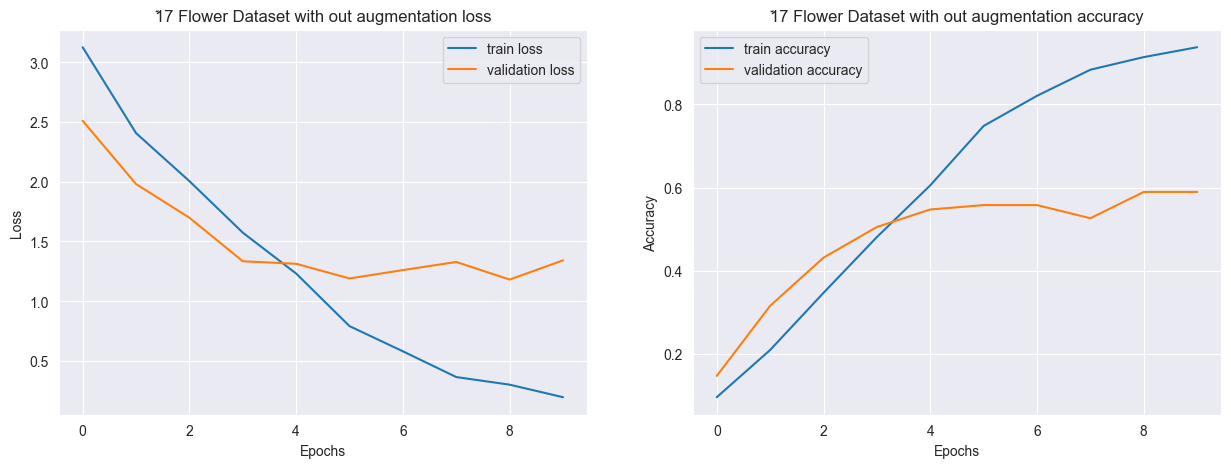

11/11 [==============================] - 3s 271ms/step


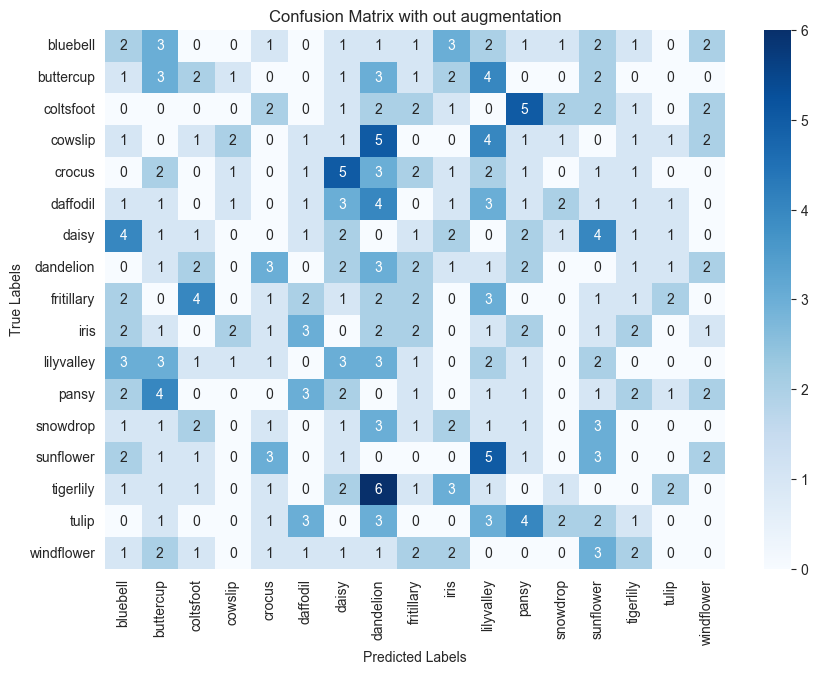

C:\Users\Eiliya\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = Sequential([
    Input(shape=(256, 256, 3)),

    Conv2D(32, kernel_size=(3, 3), activation=relu, padding='same'),
    MaxPooling2D(),

    Conv2D(64, kernel_size=(3, 3), activation=relu, padding='same'),
    MaxPooling2D(),

    Flatten(),

    Dropout(.2),
    Dense(128, activation=relu),
    Dropout(.2),
    Dense(64, activation=relu),
    Dropout(.2),
    Dense(17, activation=softmax),
])

model.compile(
    optimizer=Adam(),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)

train_result = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)
test_result = model.evaluate(test_dataset)
print(f'Test result: {test_result}')

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5))

ax_1.plot(train_result.history['loss'], label='train loss')
ax_1.plot(train_result.history['val_loss'], label='validation loss')
ax_1.legend()
ax_1.set_title('ّ17 Flower Dataset with out augmentation loss')
ax_1.set_xlabel('Epochs')
ax_1.set_ylabel('Loss')

ax_2.plot(train_result.history['accuracy'], label='train accuracy')
ax_2.plot(train_result.history['val_accuracy'], label='validation accuracy')
ax_2.legend()
ax_2.set_title('ّ17 Flower Dataset with out augmentation accuracy')
ax_2.set_xlabel('Epochs')
ax_2.set_ylabel('Accuracy')

plt.show()

test_labels = test_dataset.classes
predictions = model.predict(test_dataset)

predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_indices.keys(),
            yticklabels=test_dataset.class_indices.keys())
plt.title('Confusion Matrix with out augmentation')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

model.save('/content/drive/MyDrive/PyLearn/Assignment_53_7.3/2 - 17 flowers/models/model with out augmentation.keras')
model.save('/content/drive/MyDrive/PyLearn/Assignment_53_7.3/2 - 17 flowers/models/model with out augmentation.h5')

In [ ]:
train_dataset_path = '/content/drive/MyDrive/PyLearn/Datasets/17Flowers/train'

train_data_generator = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=.1,
)

train_dataset = train_data_generator.flow_from_directory(
    train_dataset_path,
    shuffle=True,
    subset='training',
    batch_size=32,
    target_size=(256, 256)
)

validation_dataset = train_data_generator.flow_from_directory(
    train_dataset_path,
    shuffle=False,
    subset='validation',
    batch_size=32,
    target_size=(256, 256)
)

Found 925 images belonging to 17 classes.
Found 95 images belonging to 17 classes.


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 1011s 34s/step - accuracy: 0.0656 - loss: 3.4478 - val_accuracy: 0.1684 - val_loss: 2.7720
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 920s 32s/step - accuracy: 0.1584 - loss: 2.7025 - val_accuracy: 0.2947 - val_loss: 2.3436
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 923s 32s/step - accuracy: 0.2484 - loss: 2.3500 - val_accuracy: 0.4737 - val_loss: 1.9392
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 933s 32s/step - accuracy: 0.5056 - loss: 1.6415 - val_accuracy: 0.5684 - val_loss: 1.3090
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 921s 32s/step - accuracy: 0.6259 - loss: 1.2400 - val_accuracy: 0.6316 - val_loss: 1.3983
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 927s 32s/step - accuracy: 0.6929 - loss: 0.9480 - val_accuracy: 0.7158 - val_loss: 1.1334
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 938s 32s/step - accuracy: 0.7528 - loss: 0.8542 - val_accuracy: 0.8105 - val_loss: 0.6991
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 915s 32s/step - accuracy: 0.8358 - loss: 0.5666 - val_accuracy: 0

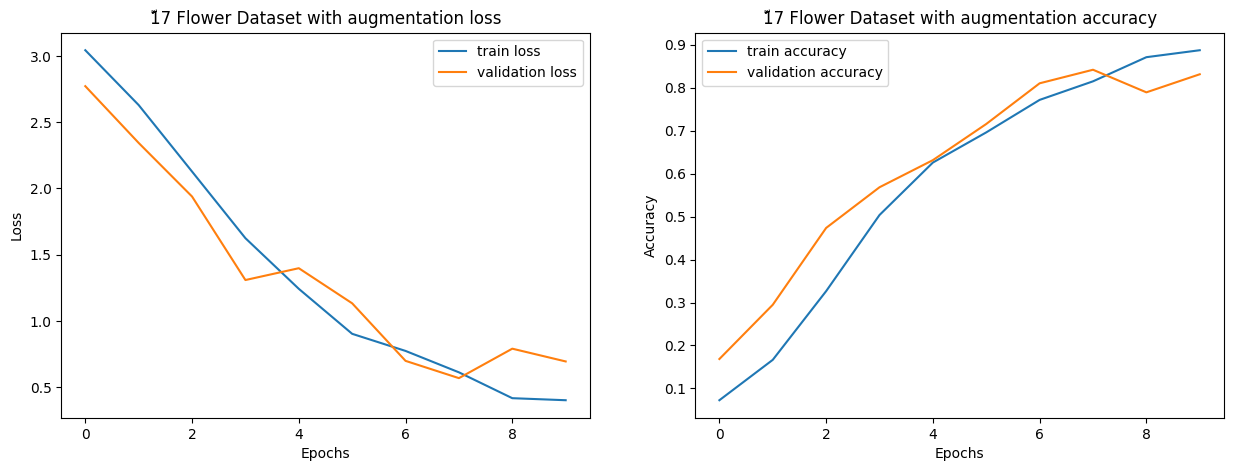

11/11 ━━━━━━━━━━━━━━━━━━━━ 252s 23s/step


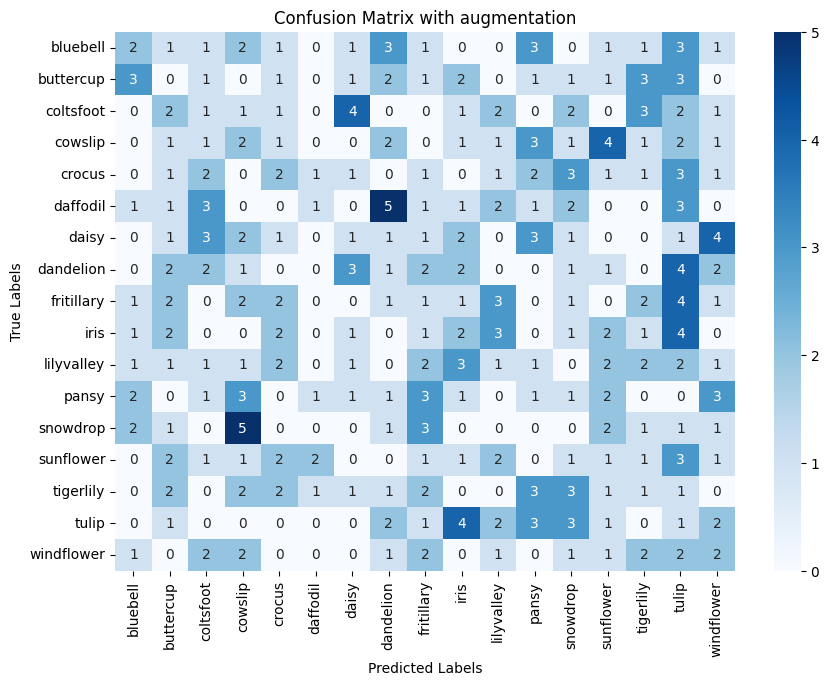

In [ ]:
from keras.applications import VGG16

vgg_conv = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False

model = Sequential([
    Input(shape=(256, 256, 3)),
    vgg_conv,
    Flatten(),

    Dense(1024, activation=relu),
    Dropout(.5),
    Dense(17, activation=softmax)
])

model.compile(
    optimizer=RMSprop(learning_rate=2e-4),
    loss=categorical_crossentropy,
    metrics=['accuracy']
)

train_result = model.fit(train_dataset, validation_data=validation_dataset, epochs=10)
test_result = model.evaluate(test_dataset)
print(f'Test result: {test_result}')

fig, (ax_1, ax_2) = plt.subplots(1, 2, figsize=(15, 5))

ax_1.plot(train_result.history['loss'], label='train loss')
ax_1.plot(train_result.history['val_loss'], label='validation loss')
ax_1.legend()
ax_1.set_title('ّ17 Flower Dataset with augmentation loss')
ax_1.set_xlabel('Epochs')
ax_1.set_ylabel('Loss')

ax_2.plot(train_result.history['accuracy'], label='train accuracy')
ax_2.plot(train_result.history['val_accuracy'], label='validation accuracy')
ax_2.legend()
ax_2.set_title('ّ17 Flower Dataset with augmentation accuracy')
ax_2.set_xlabel('Epochs')
ax_2.set_ylabel('Accuracy')

plt.show()

test_labels = test_dataset.classes
predictions = model.predict(test_dataset)

predicted_labels = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, predicted_labels)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_dataset.class_indices.keys(),
            yticklabels=test_dataset.class_indices.keys())
plt.title('Confusion Matrix with augmentation')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

model.save('/content/drive/MyDrive/PyLearn/Assignment_53_7.3/2 - 17 flowers/models/model with augmentation.keras')
model.save('/content/drive/MyDrive/PyLearn/Assignment_53_7.3/2 - 17 flowers/models/model with augmentation.h5')